In [1]:
import numpy as np
from matplotlib import pyplot as plt

import astropy.units as u
from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion
import matplotlib.pyplot as plt
from gammapy.analysis import Analysis, AnalysisConfig
from gammapy.datasets import MapDatasetOnOff
from gammapy.estimators import ExcessMapEstimator
from gammapy.makers import RingBackgroundMaker, SafeMaskMaker
from gammapy.data import DataStore

import pandas as pd
import seaborn as sns

In [2]:
#datastore = DataStore.from_dir("/raid/romulus/swong/mydl3/crabtestbkgsnew/")
datastore = DataStore.from_dir("/raid/romulus/swong/mydl3/crabtestbkgs_not_smoothed/")
selection = dict(
    type="sky_circle",
    frame="icrs",
    lon="83.633 deg",
    lat="22.014 deg",
    #lon=151.7633333,
    #lat=16.0736111,
    radius="2 deg",
)
#observations = datastore.get_observations()
selected_obs_table = datastore.obs_table.select_observations(selection)
observations = datastore.get_observations(selected_obs_table["OBS_ID"])


64080


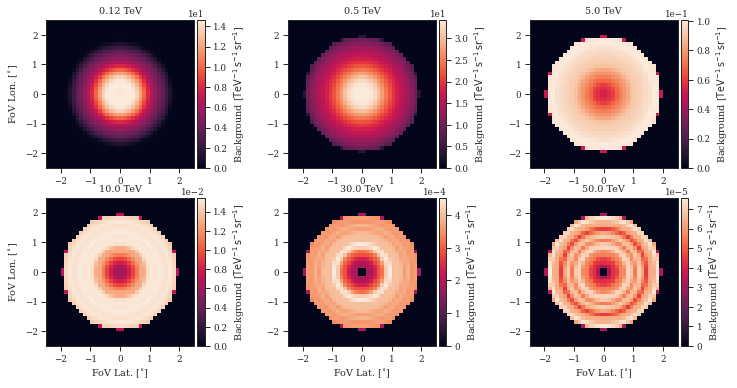

64081


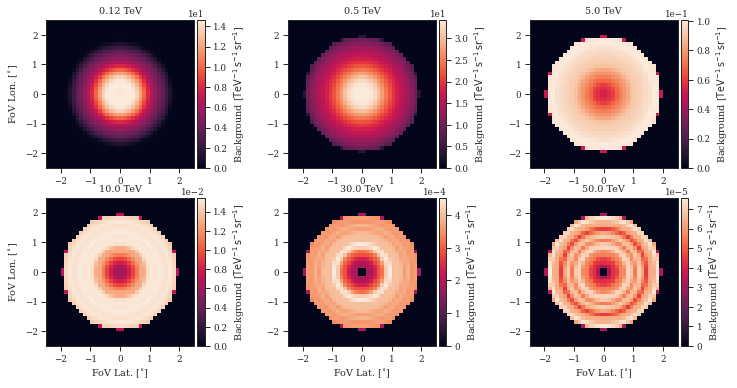

64082


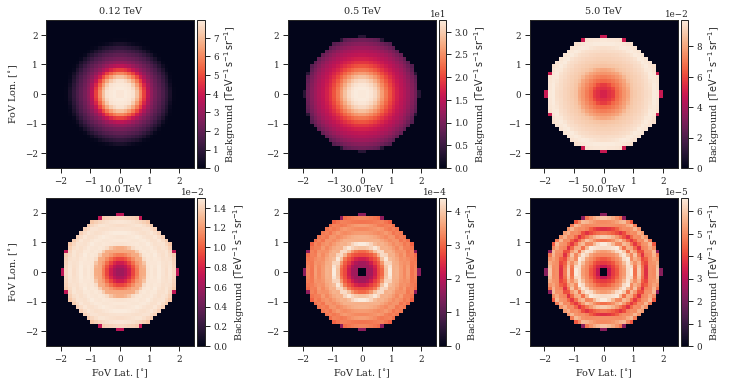

64083


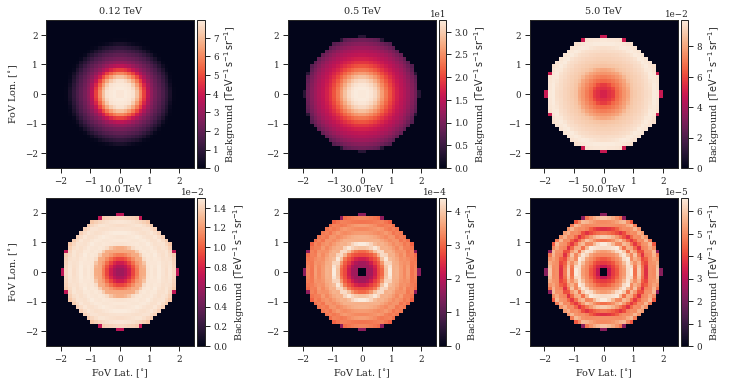

In [3]:
sns.set_theme(font="Serif",style='ticks',context='paper',palette='pastel')

for obs in observations:
    print(obs.obs_id)
    #obs.peek()
    obs.bkg.plot_at_energy([0.12 * u.TeV,0.5*u.TeV,5*u.TeV,10*u.TeV,30*u.TeV,50*u.TeV])
    plt.show()

In [4]:
bkg = observations[0].bkg

In [5]:
offset = observations[1].bkg.axes['offset']
#offset = observations[0].bkg.axes['fov_lon']

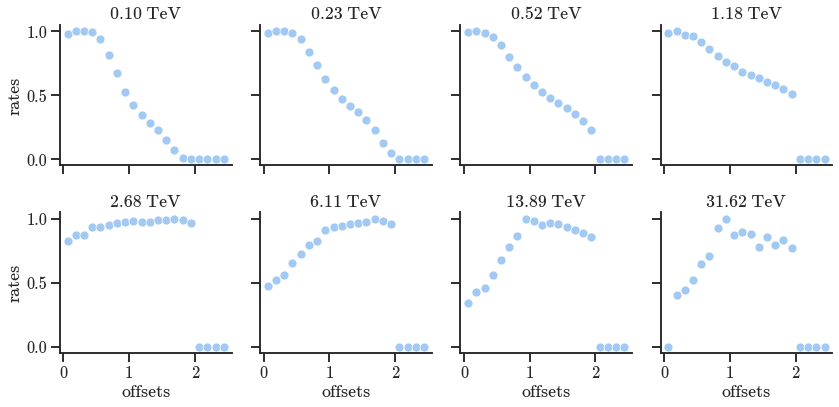

In [6]:
energies = np.logspace(-1,1.5,8) * u.TeV
dataframes = []

sns.set(font="MathJax_Main",style='ticks',context='talk',palette='pastel')

for energy in energies:
    rates = []
    for off in offset.center:
        rate = bkg.evaluate(offset=off,energy=energy)
        rates.append(rate.value)
    rates = rates/max(rates)
    df = pd.DataFrame({"offsets": offset.center,
                      "rates": rates})
    dataframes.append(df)

dfs = pd.concat(dataframes, keys=range(len(dataframes)), names=["keys"])
dfs = dfs.reset_index(level="keys")
grid = sns.FacetGrid(data=dfs, col="keys", col_wrap=4)
grid.map(sns.scatterplot, "offsets", "rates")
for ax, energy in zip(grid.axes.flat, energies):
    ax.set_title(f'{energy:.2f}')
plt.show()

64080


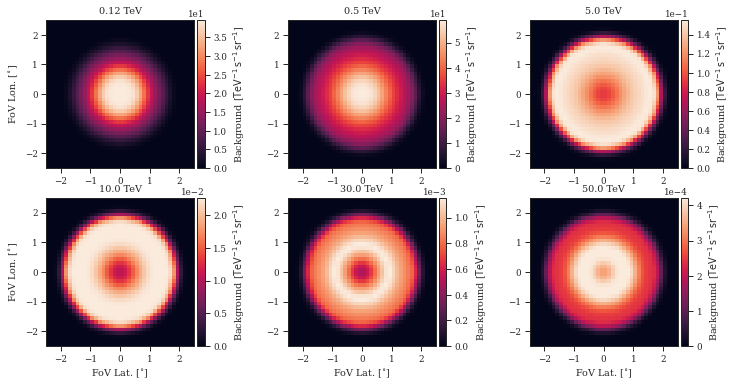

64081


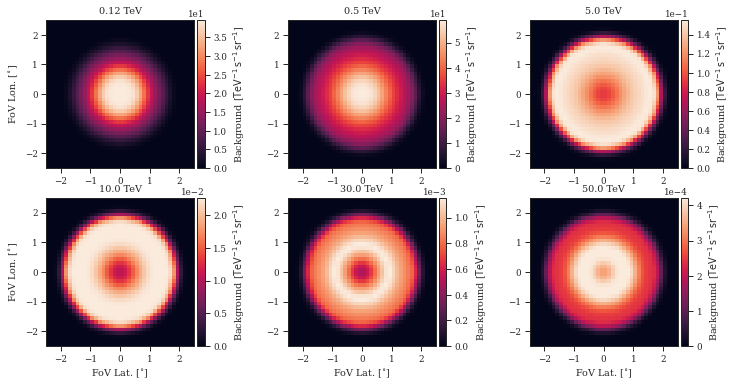

64082


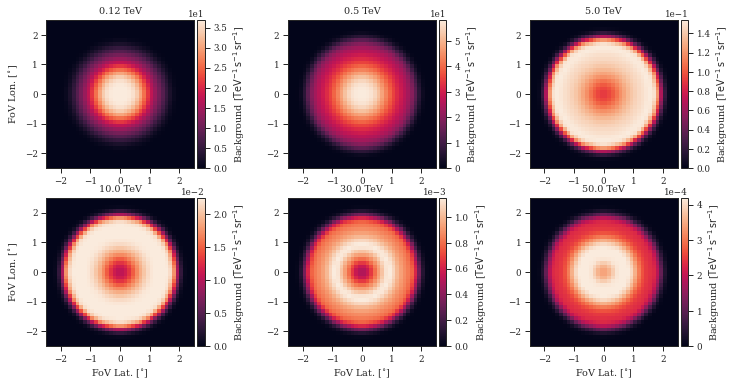

64083


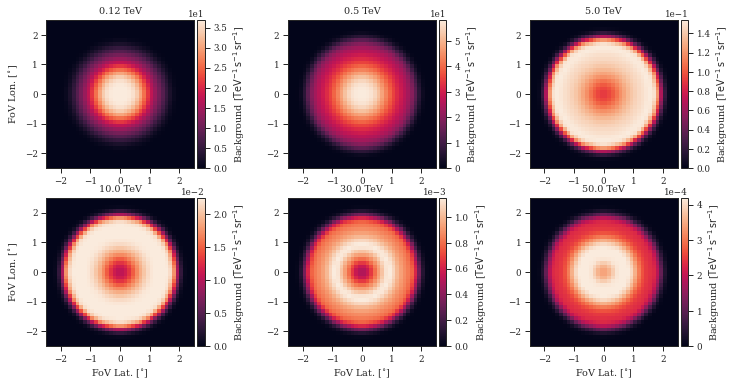

In [7]:
datastore = DataStore.from_dir("/raid/romulus/swong/mydl3/crabtestbkgs_smoothed/")
selection = dict(
    type="sky_circle",
    frame="icrs",
    lon="83.633 deg",
    lat="22.014 deg",
    #lon=151.7633333,
    #lat=16.0736111,
    radius="2 deg",
)
#observations = datastore.get_observations()
selected_obs_table = datastore.obs_table.select_observations(selection)
observations_smooth = datastore.get_observations(selected_obs_table["OBS_ID"])
bkg_smooth = observations_smooth[0].bkg
sns.set_theme(font="Serif",style='ticks',context='paper',palette='pastel')

for obs in observations_smooth:
    print(obs.obs_id)
    #obs.peek()
    obs.bkg.plot_at_energy([0.12 * u.TeV,0.5*u.TeV,5*u.TeV,10*u.TeV,30*u.TeV,50*u.TeV])
    plt.show()

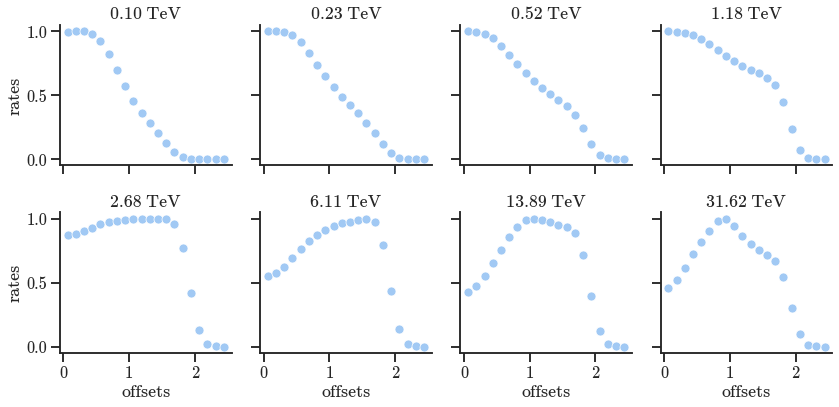

In [8]:
energies = np.logspace(-1,1.5,8) * u.TeV
dataframes = []

sns.set(font="MathJax_Main",style='ticks',context='talk',palette='pastel')

for energy in energies:
    rates = []
    for off in offset.center:
        rate = bkg_smooth.evaluate(offset=off,energy=energy)
        rates.append(rate.value)
    rates = rates/max(rates)
    df = pd.DataFrame({"offsets": offset.center,
                      "rates": rates})
    dataframes.append(df)

dfs = pd.concat(dataframes, keys=range(len(dataframes)), names=["keys"])
dfs = dfs.reset_index(level="keys")
grid = sns.FacetGrid(data=dfs, col="keys", col_wrap=4)
grid.map(sns.scatterplot, "offsets", "rates")
for ax, energy in zip(grid.axes.flat, energies):
    ax.set_title(f'{energy:.2f}')
plt.show()

In [9]:
rates = []
rates_smooth = []
for off in offset.center:
    rate = bkg.evaluate(offset=off,energy=energy)
    rate_smooth = bkg_smooth.evaluate(offset=off,energy=energy)
    rates.append(rate.value)
    rates_smooth.append(rate_smooth.value)

Text(0, 0.5, 'background rate')

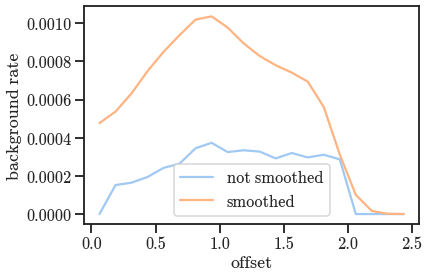

In [10]:
plt.plot(offset.center,rates,label='not smoothed')
plt.plot(offset.center,rates_smooth,label='smoothed')
plt.legend()
plt.xlabel('offset')
plt.ylabel('background rate')

23523


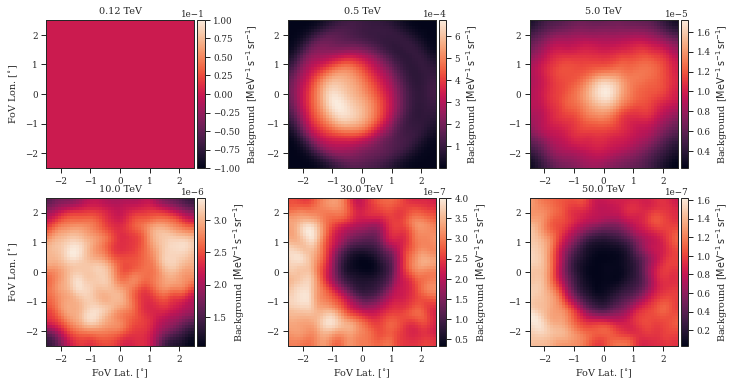

23526


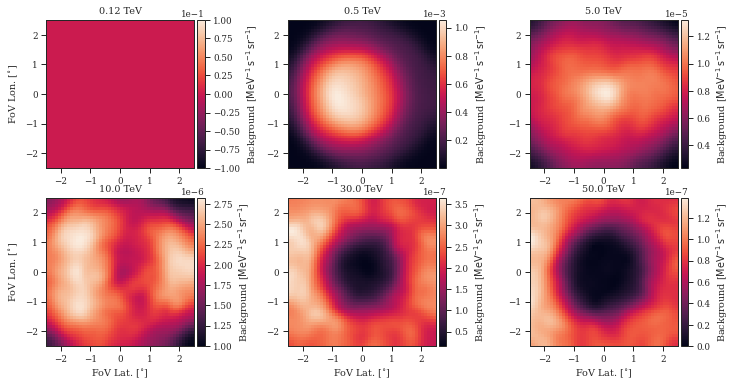

23559


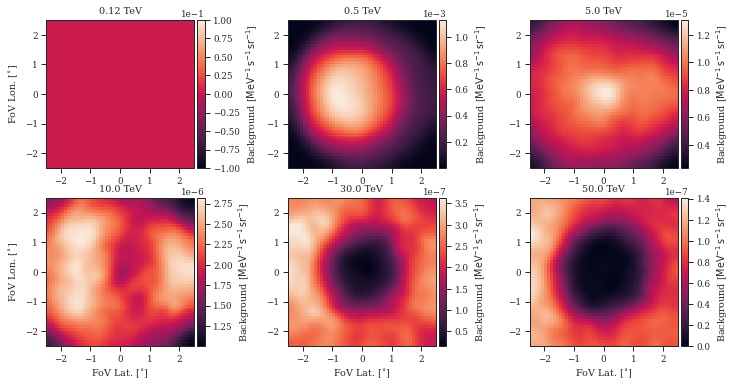

23592


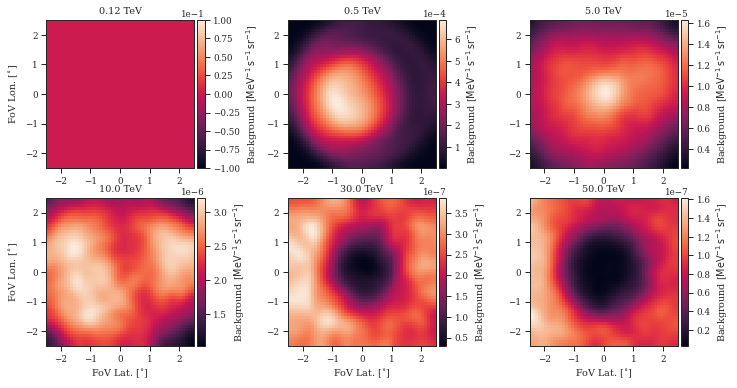

In [24]:
datastore = DataStore.from_dir("$GAMMAPY_DATA/hess-dl3-dr1/")
selection = dict(
    type="sky_circle",
    frame="icrs",
    lon="83.633 deg",
    lat="22.014 deg",
    #lon=151.7633333,
    #lat=16.0736111,
    radius="5 deg",
)
#observations = datastore.get_observations()
selected_obs_table = datastore.obs_table.select_observations(selection)
observations_smooth = datastore.get_observations(selected_obs_table["OBS_ID"])
bkg_smooth = observations_smooth[0].bkg
sns.set_theme(font="Serif",style='ticks',context='paper',palette='pastel')

for obs in observations_smooth:
    print(obs.obs_id)
    #obs.peek()
    obs.bkg.plot_at_energy([0.12 * u.TeV,0.5*u.TeV,5*u.TeV,10*u.TeV,30*u.TeV,50*u.TeV])
    plt.show()

In [25]:
lon=obs.bkg.axes['fov_lon']
lat=obs.bkg.axes['fov_lat']
e = obs.bkg.axes['energy']

/raid/romulus/swong/tmp/ipykernel_597450/1439598258.py:12: RuntimeWarning: invalid value encountered in divide
  rates = rates/max(rates)


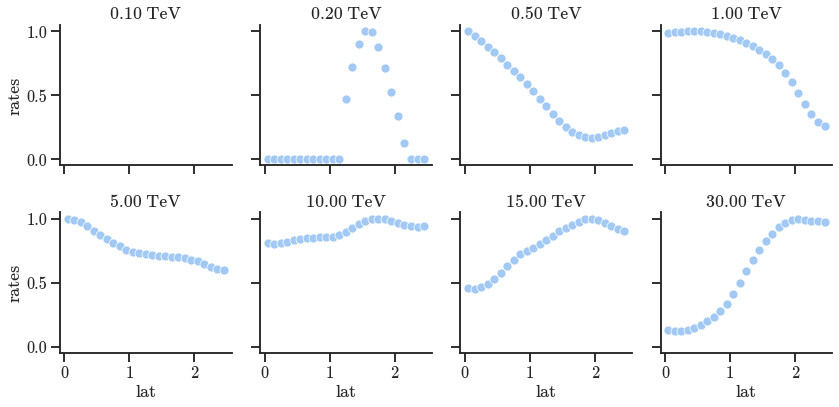

In [26]:
# 3d bkgs
energies = [0.1,0.2,0.5,1,5,10,15,30] * u.TeV
dataframes = []

sns.set(font="MathJax_Main",style='ticks',context='talk',palette='pastel')

for energy in energies:
    rates = []
    for off in lat.center[lat.center>=0]:
            rate = obs.bkg.evaluate(fov_lon=0*u.deg,fov_lat=off,energy=energy)
            rates.append(rate.value)
    rates = rates/max(rates)
    #print(len(rates))

    df = pd.DataFrame({"lon": lon.center[lat.center>=0],
                       "lat": lat.center[lat.center>=0],
                       "rates": rates})
    dataframes.append(df)
    #plt.plot(lon.center,rates[0])

dfs = pd.concat(dataframes, keys=range(len(dataframes)), names=["keys"])
dfs = dfs.reset_index(level="keys")
grid = sns.FacetGrid(data=dfs, col="keys", col_wrap=4)
grid.map(sns.scatterplot, "lat", "rates")
for ax, energy in zip(grid.axes.flat, energies):
    ax.set_title(f'{energy:.2f}')
plt.show()

In [ ]:
import gammapy
import os
files = os.listdir('/raid/romulus/swong/mydl3/lookup2d/') 

for file in files:
    f = gammapy.irf.load_irf_dict_from_file('/raid/romulus/swong/mydl3/lookup2d/'+file)
    print(file)
    bkg = f['bkg']
    offset = bkg.axes['offset']
    energies = np.logspace(-1,1.5,8) * u.TeV
    dataframes = []

    sns.set(font="MathJax_Main",style='ticks',context='talk',palette='pastel')

    for energy in energies:
        rates = []
        for off in offset.center:
            rate = bkg.evaluate(offset=off,energy=energy)
            rates.append(rate.value)
        rates = rates/max(rates)
        df = pd.DataFrame({"offsets": offset.center,
                          "rates": rates})
        dataframes.append(df)

    dfs = pd.concat(dataframes, keys=range(len(dataframes)), names=["keys"])
    dfs = dfs.reset_index(level="keys")
    grid = sns.FacetGrid(data=dfs, col="keys", col_wrap=4)
    grid.map(sns.scatterplot, "offsets", "rates")
    for ax, energy in zip(grid.axes.flat, energies):
        ax.set_title(f'{energy:.2f}')
    plt.show()

In [16]:
type(bkg)

gammapy.irf.background.Background2D